____

# Trabajo Práctico Ciencia de Datos: Telco Churn

____


__Universidad Tecnológica Nacional, Buenos Aires__<br/>
__Ingeniería Industrial__<br/>
__Cátedra de Ciencia de Datos - Cluster AI__<br/>
__Elaborado por: Gaspar Rivollier__<br/>
__2023__<br/>
____

# 4. Modelo de aprendizaje

In [211]:
#Preparamos notebook para trabajar localmente o en GoogleCollab
# Verificamos si estamos en Colab
var_google_colab = 'google.colab' in str(get_ipython())
print(var_google_colab)
if var_google_colab:
  #Montamos nuestro G.Drive
  from google.colab import drive
  drive.mount('/content/gdrive',force_remount=True)
  # Direccion root donde está la jupyter-notebook
  root_path = "/content/gdrive/MyDrive/UTN/TP Cs Datos/post_eda_telco_churn_clusterai.csv"
  # Direccion donde guardaremos las imagenes
  plot_path = root_path
else:
  # Si, no estamos en google colab, es que estamos corriendo la
  # en local.
  root_path = ""
  plot_path = root_path

True
Mounted at /content/gdrive


In [212]:
clients_df = pd.read_csv(root_path)

In [213]:
clients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 1276 non-null   int64  
 1   SeniorCitizen              1276 non-null   float64
 2   Partner                    1276 non-null   int64  
 3   Dependents                 1276 non-null   int64  
 4   tenure                     1276 non-null   float64
 5   PhoneService               1276 non-null   int64  
 6   MultipleLines              1276 non-null   int64  
 7   OnlineSecurity             1276 non-null   int64  
 8   OnlineBackup               1276 non-null   int64  
 9   DeviceProtection           1276 non-null   int64  
 10  TechSupport                1276 non-null   int64  
 11  StreamingTV                1276 non-null   int64  
 12  StreamingMovies            1276 non-null   int64  
 13  PaperlessBilling           1276 non-null   int64

In [214]:
#Dropeamos columna Unnamed: 0
clients_df = clients_df.drop('Unnamed: 0',axis=1)

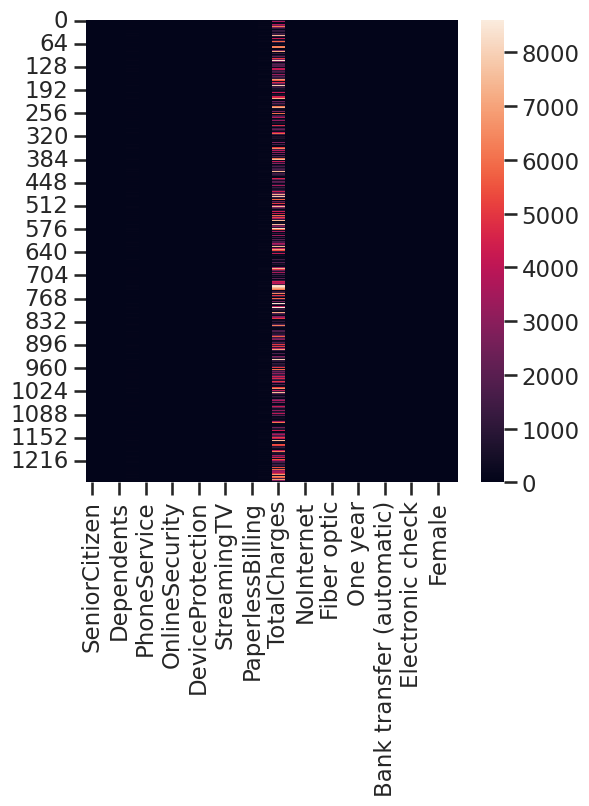

In [215]:
#realicemos un heatmap del dataframe
sns.set_style("white")
sns.set_context("talk")
sns.set_style("ticks")
sns.heatmap(clients_df)
plt.show()

In [216]:
# Generamos x e y
target = 'Churn'
y = clients_df[target].values.ravel()
x = clients_df.drop("Churn", axis=1)

# Separamos dataset en train y test
# obtenemos xtrain, xtest, ytrain e ytest
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=4)

In [217]:
# observamos como queda la matriz de xtrain
xtrain.shape

(957, 27)

In [218]:
# observamos como queda la matriz de xtest
xtest.shape

(319, 27)

In [219]:
# observamos como queda la matriz de ytrain
ytrain.shape

(957,)

In [220]:
# observamos como queda la matriz de ytest
ytest.shape

(319,)

In [221]:
# auto scaling train- set (mean = 0, std = 1)
# ver que en la misma linea creamos el standard scaler y lo "fiteamos" al mismo tiempo con "xtrain"
scaler = preprocessing.StandardScaler().fit(xtrain)

In [222]:
# xtrain_scal tendra el dataset de train pre-procesado con el standard scaler
xtrain_scal = scaler.transform(xtrain)

In [223]:
# utilizando el scaler "fiteado" o "ajustado" a los datos de train, aplicamos el scaler a los datos de test.
# obtenemos "xtest_scal"
xtest_scal = scaler.transform(xtest)

Text(0.5, 1.0, 'Standarized test data')

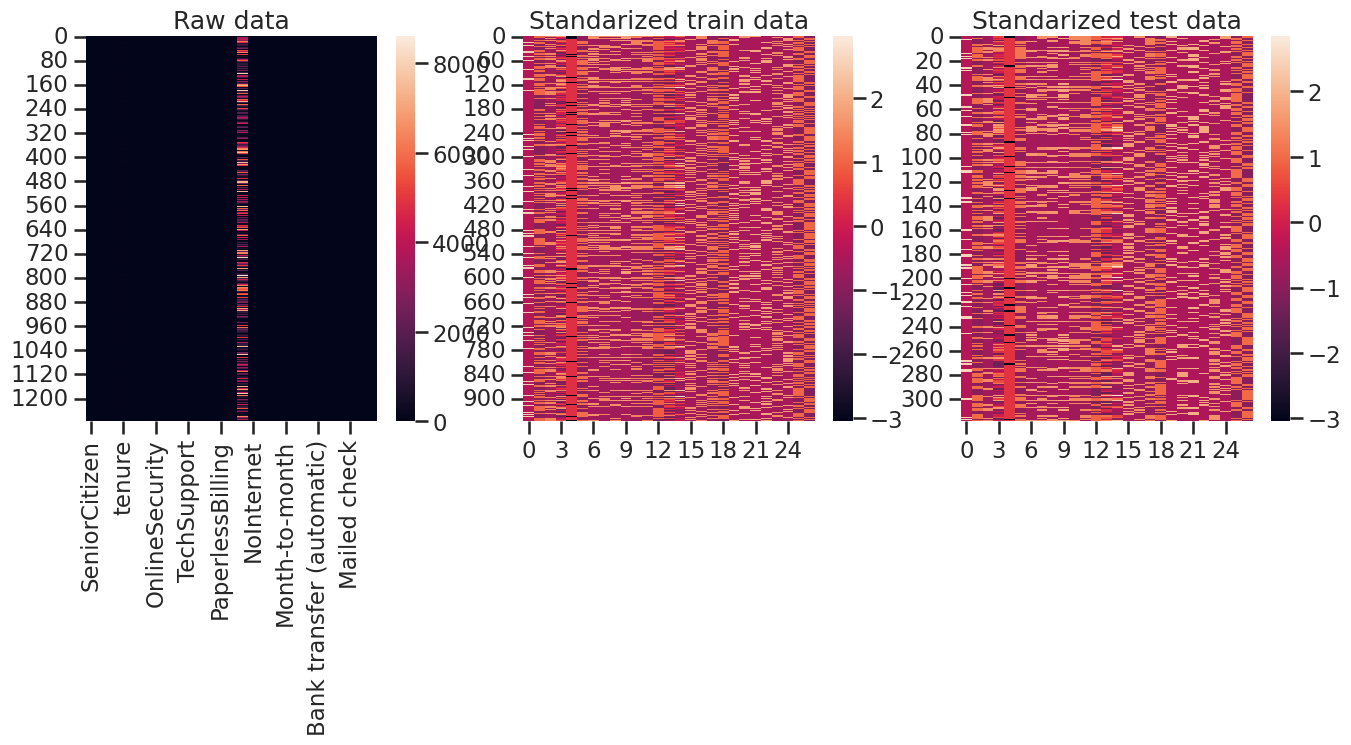

In [224]:
fig, axs = plt.subplots(1, 3, figsize=(16,5))
sns.heatmap(x, ax = axs[0])
sns.heatmap(xtrain_scal, ax = axs[1])
sns.heatmap(xtest_scal, ax = axs[2])
axs[0].set_title('Raw data')
axs[1].set_title('Standarized train data')
axs[2].set_title('Standarized test data')

In [225]:
#Estandarizado.
#Vamos a utilizar logistic regression para el modelo. Como punto de partida utilizaremos los parámetros estándar

In [226]:
#Regresion logistica inicial sin gridsearch
from sklearn.linear_model import LogisticRegression
logreg_default = LogisticRegression().fit(xtrain_scal,ytrain)

In [227]:
#Predicción sobre X de test con modelo de regresion logistica
ypred_logreg_default = logreg_default.predict(xtest_scal)

In [228]:
#Computo el accuracy (comparar ytest vs ypred)
test_acc_logreg_default = accuracy_score(ytest, ypred_logreg_default)
print("El accuracy es " + str(test_acc_logreg_default))

El accuracy es 0.8087774294670846


In [229]:
#compute and plot AUC
yproba_logreg_default = logreg_default.predict_proba(xtest_scal)
fpr_logreg_default, tpr_logreg_default, thresholds_logreg_default = roc_curve(ytest.astype('int'), yproba_logreg_default[:,1], drop_intermediate = False)
auc_logreg_default = metrics.auc(fpr_logreg_default, tpr_logreg_default)
print("El AUC es = " + str(auc_logreg_default))

El AUC es = 0.8256949661908339


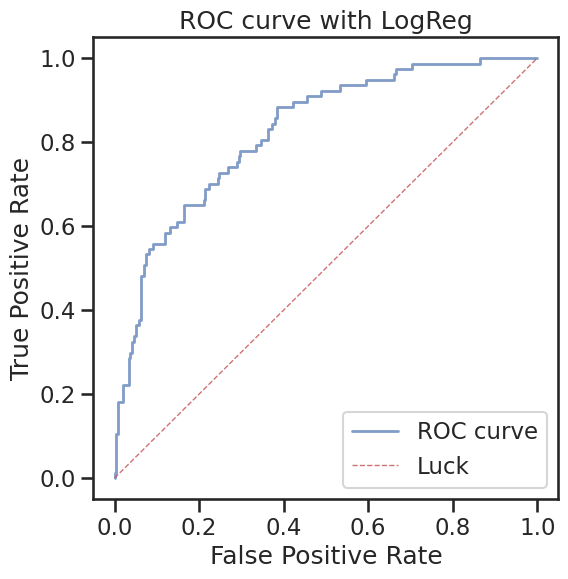

In [230]:
plt.plot(fpr_logreg_default, tpr_logreg_default, lw=2, alpha=0.7 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve with LogReg')
plt.show()

In [231]:
#Compute confusion Matrix
cm_logreg_default = confusion_matrix(ytest, ypred_logreg_default)
cm_logreg_default

array([[215,  27],
       [ 34,  43]])

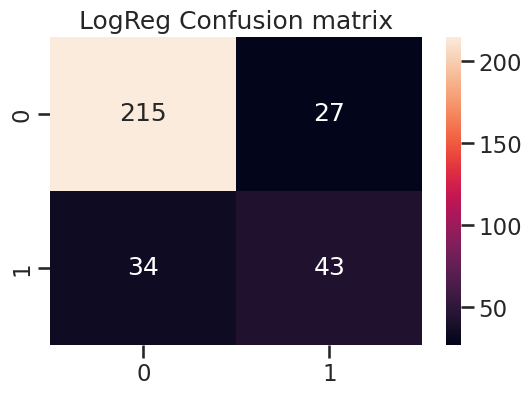

In [232]:
df_cm_logreg_default = pd.DataFrame(cm_logreg_default)
plt.figure(figsize = (6,4))
sns.heatmap(df_cm_logreg_default, annot=True, fmt='d')
plt.title('LogReg Confusion matrix')
plt.show()

In [233]:
# Create a logistic regression model
lr = LogisticRegression()

# Define the parameters for grid search
parameters = {'penalty': ['none','l1', 'l2'], 'C': [0.001, 0.009, 0.012 ,0.01, 0.05, 0.1, 0.3, 0.8, 1, 10, 100, 1000]}

# Create a grid search object
logreg_gs = GridSearchCV(lr,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=5,
                           verbose=0)

# Fit the grid search to the data
logreg_gs.fit(xtrain_scal, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.009, 0.012, 0.01, 0.05, 0.1, 0.3, 0.8,
                               1, 10, 100, 1000],
                         'penalty': ['none', 'l1', 'l2']},
             scoring='accuracy')

In [234]:
#observamos el mejor modelo y combinacion de hiperparametros que ganaron en el cross validation
logreg_gs.best_params_

{'C': 0.009, 'penalty': 'l2'}

In [235]:
# Use the best estimator for predictions
ypred_logreg_gs = logreg_gs.predict(xtest_scal)
test_acc_logreg_gs = accuracy_score(ytest, ypred_logreg_gs)
print("El accuracy es " + str(test_acc_logreg_gs))

El accuracy es 0.8244514106583072


In [236]:
#compute and plot AUC
yproba_logreg_gs = logreg_gs.predict_proba(xtest_scal)
fpr_logreg_gs, tpr_logreg_gs, thresholds_logreg_gs = roc_curve(ytest.astype('int'), yproba_logreg_gs[:,1], drop_intermediate = False)
auc_logreg_gs = metrics.auc(fpr_logreg_gs, tpr_logreg_gs)
print("El AUC es = " + str(auc_logreg_gs))

El AUC es = 0.8347644091445745


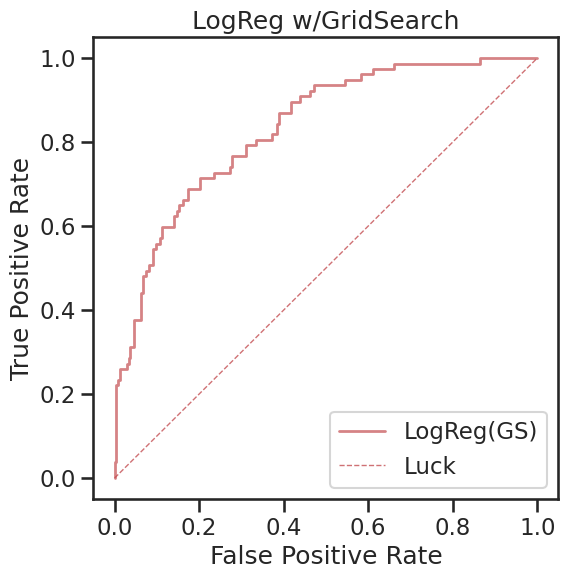

In [237]:
plt.plot(fpr_logreg_gs, tpr_logreg_gs, lw=2, alpha=0.7 , label = 'LogReg(GS)', color = 'r')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve with LogReg')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('LogReg w/GridSearch')
plt.show()

In [238]:
#Compute confusion Matrix
cm_logreg_gs = confusion_matrix(ytest, ypred_logreg_gs)
cm_logreg_gs

array([[226,  16],
       [ 40,  37]])

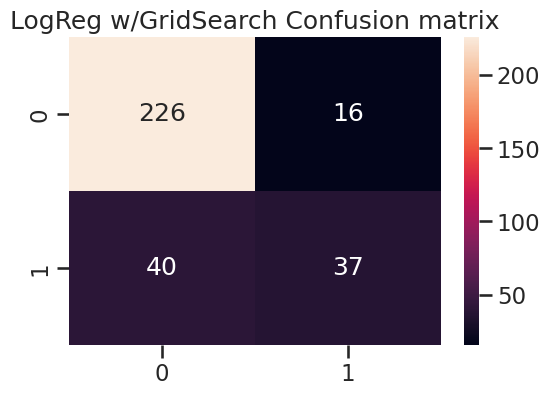

In [239]:
df_cm_logreg_gs = pd.DataFrame(cm_logreg_gs)
plt.figure(figsize = (6,4))
sns.heatmap(df_cm_logreg_gs, annot=True, fmt='d')
plt.title('LogReg w/GridSearch Confusion matrix')
plt.show()

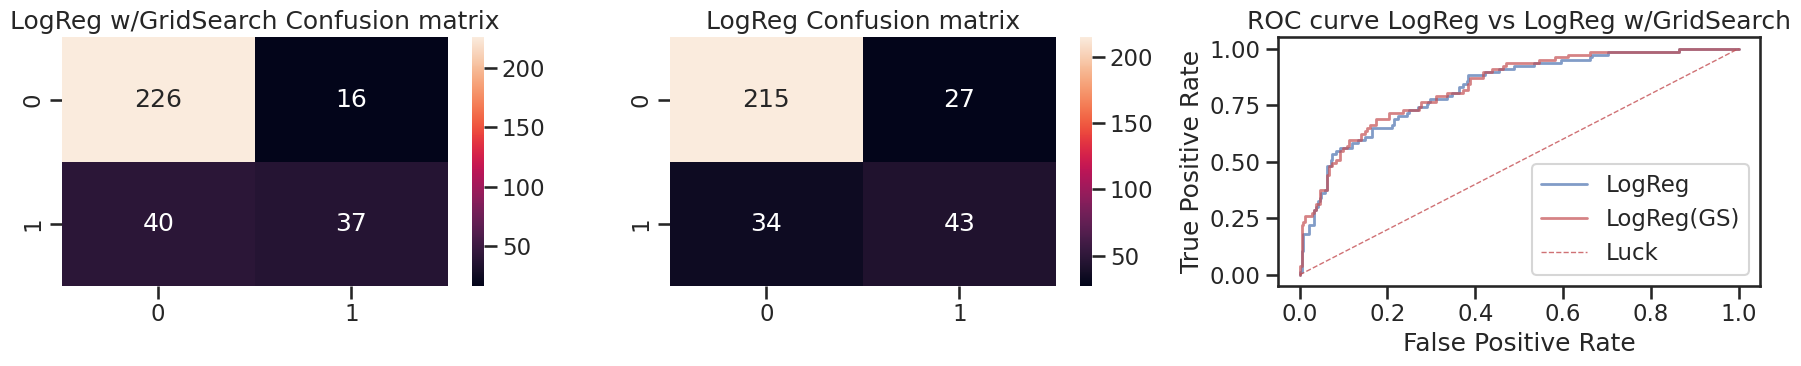

In [240]:
# Plot Confusion Matrix for LogReg w/GridSearch
plt.figure(figsize=(18, 4))  # Adjust the width and height of the entire figure

# Subplot 1: Confusion Matrix for LogReg w/GridSearch
plt.subplot(1, 3, 1)
df_cm2 = pd.DataFrame(cm_logreg_gs)
sns.heatmap(df_cm2, annot=True, fmt='d')
plt.title('LogReg w/GridSearch Confusion matrix')

# Subplot 2: Confusion Matrix for LogReg
plt.subplot(1, 3, 2)
df_cm = pd.DataFrame(cm_logreg_default)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title('LogReg Confusion matrix')

# Subplot 3: ROC curve
plt.subplot(1, 3, 3)
plt.plot(fpr_logreg_default, tpr_logreg_default, lw=2, alpha=0.7, label='LogReg', color='b')
plt.plot(fpr_logreg_gs, tpr_logreg_gs, lw=2, alpha=0.7, label='LogReg(GS)', color='r')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r', label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve LogReg vs LogReg w/GridSearch')

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

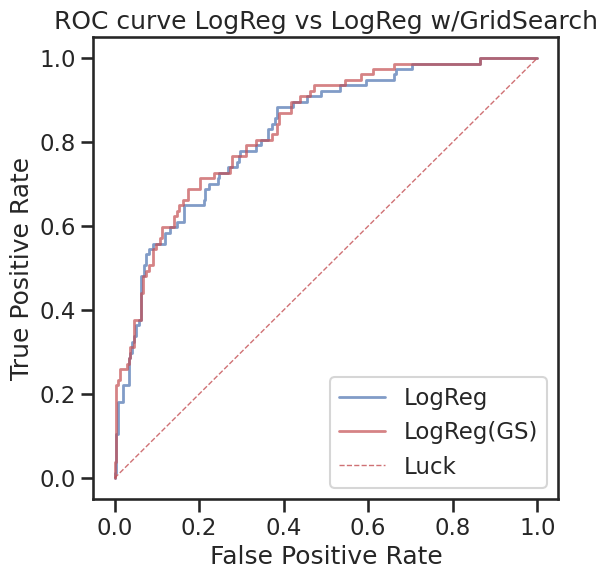

In [241]:
#Comparison of both regressions
plt.plot(fpr_logreg_default, tpr_logreg_default, lw=2, alpha=0.7 , label = 'LogReg', color = 'b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve with LogReg')
plt.plot(fpr_logreg_gs, tpr_logreg_gs, lw=2, alpha=0.7 , label = 'LogReg(GS)', color = 'r')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC curve LogReg vs LogReg w/GridSearch')
plt.show()

# 5. Reducción de dimensionalidad y Modelos

In [242]:
from sklearn.decomposition import PCA
# cantidad de componentes a extraer
n_comps = 8
# definimos PCA
pca = PCA(n_components = n_comps)
# fit_transform del PCA a nuestros datos
xtrain_pca = pd.DataFrame(pca.fit_transform(xtrain_scal))
# obtenemos los auto-valores
eigenvalues = pca.explained_variance_ratio_
#Para test
xtest_pca = pd.DataFrame(pca.transform(xtest_scal))

In [243]:
# verificamos que el shape de la matriz obtenida del PCA. Ver que nuestro dataset se redujo a 10 dimensiones
print(xtrain_pca.shape)
print(xtest_pca.shape)

(957, 8)
(319, 8)


In [244]:
#Entrenamos modelo nuevamente

In [245]:
#Regresion logistica inicial sin gridsearch
from sklearn.linear_model import LogisticRegression
logreg_default_pca = LogisticRegression().fit(xtrain_pca,ytrain)

In [246]:
#Predicción sobre X de test con modelo de regresion logistica
ypred_logreg_default_pca = logreg_default_pca.predict(xtest_pca)

In [247]:
#Computo el accuracy (comparar ytest vs ypred)
test_acc_logreg_default_pca = accuracy_score(ytest, ypred_logreg_default_pca)
print("El accuracy es " + str(test_acc_logreg_default_pca))

El accuracy es 0.7899686520376176


In [248]:
#compute and plot AUC
yproba_logreg_default_pca = logreg_default_pca.predict_proba(xtest_pca)
fpr_logreg_default_pca, tpr_logreg_default_pca, thresholds_logreg_default_pca = roc_curve(ytest, yproba_logreg_default_pca[:,1], drop_intermediate = False)
auc_logreg_default_pca = metrics.auc(fpr_logreg_default_pca, tpr_logreg_default_pca)
print("El AUC es = " + str(auc_logreg_default_pca))

El AUC es = 0.8271439304497155


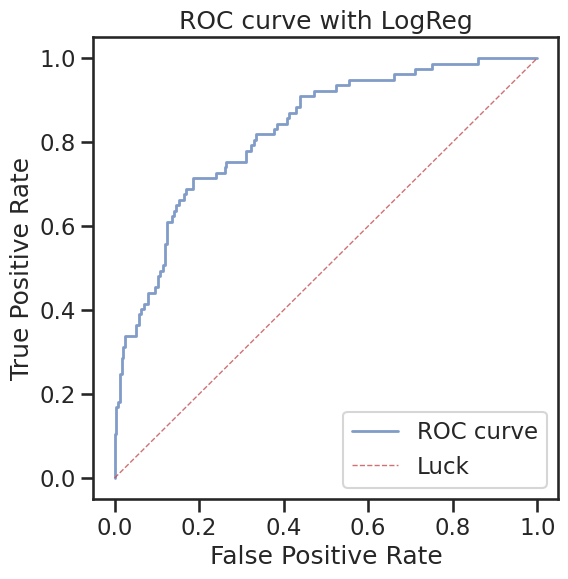

In [249]:
plt.plot(fpr_logreg_default_pca, tpr_logreg_default_pca, lw=2, alpha=0.7 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve with LogReg')
plt.show()

In [250]:
#Compute confusion Matrix
cm_logreg_default_pca = confusion_matrix(ytest, ypred_logreg_default_pca)
cm_logreg_default_pca

array([[217,  25],
       [ 42,  35]])

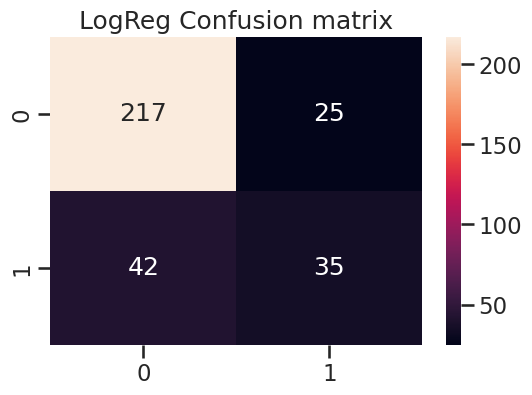

In [251]:
df_cm_logreg_default_pca = pd.DataFrame(cm_logreg_default_pca)
plt.figure(figsize = (6,4))
sns.heatmap(df_cm_logreg_default_pca, annot=True, fmt='d')
plt.title('LogReg Confusion matrix')
plt.show()

In [252]:
#Modelo regresion logistica con busqueda de parametros para Data PCA

In [253]:
# Create a logistic regression model
lr = LogisticRegression()

# Define the parameters for grid search
parameters = {'penalty': ['none','l1', 'l2'], 'C': [0.001, 0.009, 0.012 ,0.01, 0.05, 0.1, 0.3, 0.8, 1, 10, 100, 1000]}

# Create a grid search object
logreg_gs_pca = GridSearchCV(lr,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=5,
                           verbose=0)

# Fit the grid search to the data
logreg_gs_pca.fit(xtrain_pca, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.009, 0.012, 0.01, 0.05, 0.1, 0.3, 0.8,
                               1, 10, 100, 1000],
                         'penalty': ['none', 'l1', 'l2']},
             scoring='accuracy')

In [254]:
#observamos el mejor modelo y combinacion de hiperparametros que ganaron en el cross validation
logreg_gs_pca.best_params_

{'C': 0.05, 'penalty': 'l2'}

In [255]:
# Use the best estimator for predictions
ypred_logreg_gs_pca = logreg_gs_pca.predict(xtest_pca)
test_acc_logreg_gs_pca = accuracy_score(ytest, ypred_logreg_gs_pca)
print("El accuracy es " + str(test_acc_logreg_gs_pca))

El accuracy es 0.7931034482758621


In [256]:
#compute and plot AUC
yproba_logreg_gs_pca = logreg_gs_pca.predict_proba(xtest_pca)
fpr_logreg_gs_pca, tpr_logreg_gs_pca, thresholds_logreg_gs_pca = roc_curve(ytest.astype('int'), yproba_logreg_gs_pca[:,1], drop_intermediate = False)
auc_logreg_gs_pca = metrics.auc(fpr_logreg_gs_pca, tpr_logreg_gs_pca)
print("El AUC es = " + str(auc_logreg_gs_pca))

El AUC es = 0.8285928947085972


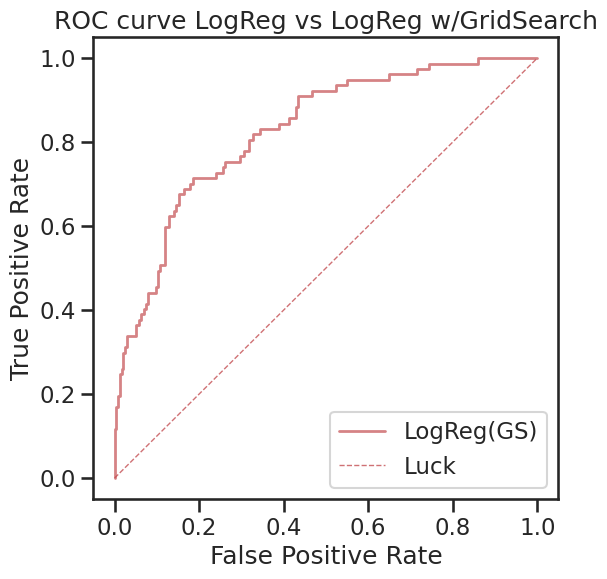

In [257]:
plt.plot(fpr_logreg_gs_pca, tpr_logreg_gs_pca, lw=2, alpha=0.7 , label = 'LogReg(GS)', color = 'r')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve with LogReg')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC curve LogReg vs LogReg w/GridSearch')
plt.show()

In [258]:
#Compute confusion Matrix
cm_logreg_gs_pca = confusion_matrix(ytest, ypred_logreg_gs_pca)
cm_logreg_gs_pca

array([[218,  24],
       [ 42,  35]])

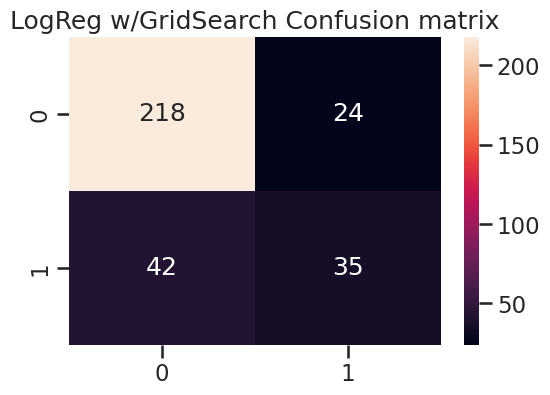

In [259]:
df_cm_logreg_gs_pca = pd.DataFrame(cm_logreg_gs_pca)
plt.figure(figsize = (6,4))
sns.heatmap(df_cm_logreg_gs_pca, annot=True, fmt='d')
plt.title('LogReg w/GridSearch Confusion matrix')
plt.show()

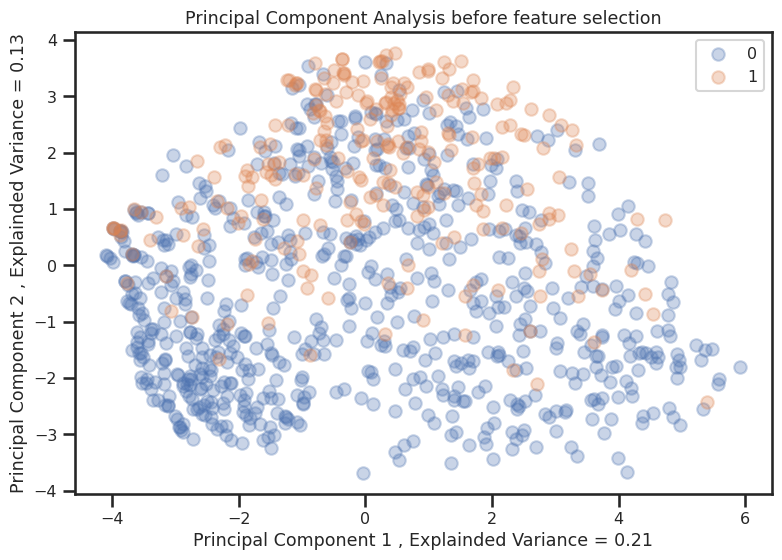

In [260]:
# Realizando una visualización de como quedan nuestros datos con PCA, vemos porque el modelo tiene problemas para clasificación solo con regresión lineal.
sns.set_context("talk", font_scale=0.7)
plt.figure(figsize=(9,6))
plt.scatter(xtrain_pca.loc[(ytrain == 0).ravel(),0],xtrain_pca.loc[(ytrain == 0).ravel(),1], alpha = 0.3, label = '0')
plt.scatter(xtrain_pca.loc[(ytrain == 1).ravel(),0],xtrain_pca.loc[(ytrain == 1).ravel(),1], alpha = 0.3, label = '1')
plt.xlabel('Principal Component 1 , Explainded Variance = ' + str(np.round(eigenvalues[0],2)))
plt.ylabel('Principal Component 2 , Explainded Variance = ' + str(np.round(eigenvalues[1],2)))
plt.title('Principal Component Analysis before feature selection')
plt.legend(loc='upper right')
plt.show()

In [261]:
#Por la complejidad de los datos se debería intentar un modelo de clasificación más compleja.

In [262]:
#Red neuronal
#libs de tensorflow-keras
import tensorflow as tf
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras import optimizers

# definimos los hiperparametros de entrenamiento de la NN
l2_reg = 0.2
lrate = 0.01
epochs = 50
bachs = 200


In [263]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

# Assuming xtrain_pca, ytrain, xtest_pca, ytest are your training and testing data

# Define the model
nn_pca = Sequential()
nn_pca.add(Dense(30, input_dim=xtrain_pca.shape[1], activation='relu', kernel_regularizer=regularizers.l2(l2_reg)))
nn_pca.add(Dense(60, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)))
nn_pca.add(Dense(1, activation='sigmoid'))

# Compile the model
nn_pca.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lrate),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
nn_pca.fit(xtrain_pca, ytrain, epochs=epochs, batch_size=bachs, validation_split=0.2)


Epoch 1/50
4/4 [==============================] - 1s 75ms/step - loss: 9.7710 - accuracy: 0.3817 - val_loss: 7.2790 - val_accuracy: 0.7188
Epoch 2/50
4/4 [==============================] - 0s 9ms/step - loss: 6.2214 - accuracy: 0.7242 - val_loss: 4.5591 - val_accuracy: 0.7240
Epoch 3/50
4/4 [==============================] - 0s 10ms/step - loss: 3.8579 - accuracy: 0.7464 - val_loss: 2.8086 - val_accuracy: 0.7240
Epoch 4/50
4/4 [==============================] - 0s 10ms/step - loss: 2.3730 - accuracy: 0.7464 - val_loss: 1.7672 - val_accuracy: 0.7240
Epoch 5/50
4/4 [==============================] - 0s 11ms/step - loss: 1.5165 - accuracy: 0.7464 - val_loss: 1.2055 - val_accuracy: 0.7240
Epoch 6/50
4/4 [==============================] - 0s 13ms/step - loss: 1.0656 - accuracy: 0.7464 - val_loss: 0.9228 - val_accuracy: 0.7240
Epoch 7/50
4/4 [==============================] - 0s 11ms/step - loss: 0.8459 - accuracy: 0.7464 - val_loss: 0.7915 - val_accuracy: 0.7240
Epoch 8/50
4/4 [============

In [264]:
# Evaluate the model on the test set
test_loss_nn_pca, test_accuracy_nn_pca = nn_pca.evaluate(xtest_pca, ytest)
print(f'Test Accuracy: {test_accuracy_nn_pca * 100:.2f}%')

# Make predictions on the test set
predictions_nn_pca = nn_pca.predict(xtest_pca)

# Set prediction to binary
binary_predictions_nn_pca = np.round(predictions_nn_pca)

# Compare predictions with ytest
accuracy_on_test_set = accuracy_score(binary_predictions_nn_pca.astype('int'), ytest)
print(f'Accuracy on Test Set: {accuracy_on_test_set * 100:.2f}%')

10/10 [==============================] - 0s 2ms/step - loss: 0.4755 - accuracy: 0.8088
Test Accuracy: 80.88%
10/10 [==============================] - 0s 1ms/step
Accuracy on Test Set: 80.88%


In [265]:
fpr_nn_pca, tpr_nn_pca, thresholds_nn_pca = roc_curve(ytest.astype('int'), predictions_nn_pca[:,0], drop_intermediate = False)
auc_nn_pca = metrics.auc(fpr_nn_pca, tpr_nn_pca)
print("El AUC es = " + str(auc_nn_pca))

El AUC es = 0.8333691102286145


In [266]:
cm_nn_pca=confusion_matrix(ytest,binary_predictions_nn_pca.astype('int'))
cm_nn_pca

array([[228,  14],
       [ 47,  30]])

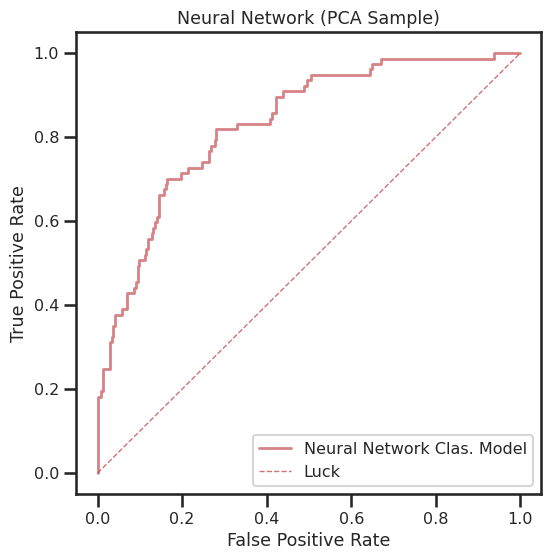

In [267]:
plt.plot(fpr_nn_pca, tpr_nn_pca, lw=2, alpha=0.7 , label = 'Neural Network Clas. Model', color = 'r')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve with LogReg')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('Neural Network (PCA Sample)')
plt.show()

In [268]:
# Probamos con datos originales

In [269]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

# Assuming xtrain_pca, ytrain, xtest_pca, ytest are your training and testing data

# Define the model
nn = Sequential()
nn.add(Dense(64, input_dim=xtrain.shape[1], activation='relu', kernel_regularizer=regularizers.l2(l2_reg)))
nn.add(Dense(32, activation='tanh', kernel_regularizer=regularizers.l2(l2_reg)))
nn.add(Dense(1, activation='sigmoid'))

# Compile the model
nn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lrate),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
nn.fit(xtrain, ytrain, epochs=epochs, batch_size=bachs, validation_split=0.2)


Epoch 1/50
4/4 [==============================] - 1s 46ms/step - loss: 14.4790 - accuracy: 0.6301 - val_loss: 10.4601 - val_accuracy: 0.7240
Epoch 2/50
4/4 [==============================] - 0s 9ms/step - loss: 8.7589 - accuracy: 0.7477 - val_loss: 6.1590 - val_accuracy: 0.7292
Epoch 3/50
4/4 [==============================] - 0s 9ms/step - loss: 5.0745 - accuracy: 0.7438 - val_loss: 3.4694 - val_accuracy: 0.7292
Epoch 4/50
4/4 [==============================] - 0s 8ms/step - loss: 2.8450 - accuracy: 0.7464 - val_loss: 1.9791 - val_accuracy: 0.7135
Epoch 5/50
4/4 [==============================] - 0s 9ms/step - loss: 1.6429 - accuracy: 0.7451 - val_loss: 1.2263 - val_accuracy: 0.7240
Epoch 6/50
4/4 [==============================] - 0s 8ms/step - loss: 1.1098 - accuracy: 0.7438 - val_loss: 0.9936 - val_accuracy: 0.7656
Epoch 7/50
4/4 [==============================] - 0s 8ms/step - loss: 0.9122 - accuracy: 0.7556 - val_loss: 0.8237 - val_accuracy: 0.7292
Epoch 8/50
4/4 [===============

In [270]:
# Evaluate the model on the test set
test_loss_nn, test_accuracy_nn = nn.evaluate(xtest, ytest)
print(f'Test Accuracy: {test_accuracy_nn * 100:.2f}%')

# Make predictions on the test set
predictions_nn = nn.predict(xtest)

# Pasamos a binario para clasificación
binary_predictions_nn = np.round(predictions_nn)

# Compare predictions with ytest
accuracy_on_test_set_nn = accuracy_score(binary_predictions_nn.astype('int'), ytest)
print(f'Accuracy on Test Set: {accuracy_on_test_set_nn * 100:.2f}%')

10/10 [==============================] - 0s 1ms/step - loss: 0.5630 - accuracy: 0.7774
Test Accuracy: 77.74%
10/10 [==============================] - 0s 2ms/step
Accuracy on Test Set: 77.74%


In [271]:
fpr_nn, tpr_nn, thresholds = roc_curve(ytest.astype('int'), predictions_nn[:,0], drop_intermediate = False)
auc_nn = metrics.auc(fpr_nn, tpr_nn)
print("El AUC es = " + str(auc_nn))

El AUC es = 0.6052377374691424


In [272]:
cm_nn=confusion_matrix(ytest,predictions_nn[:,0].astype('int'))
cm_nn

array([[242,   0],
       [ 77,   0]])

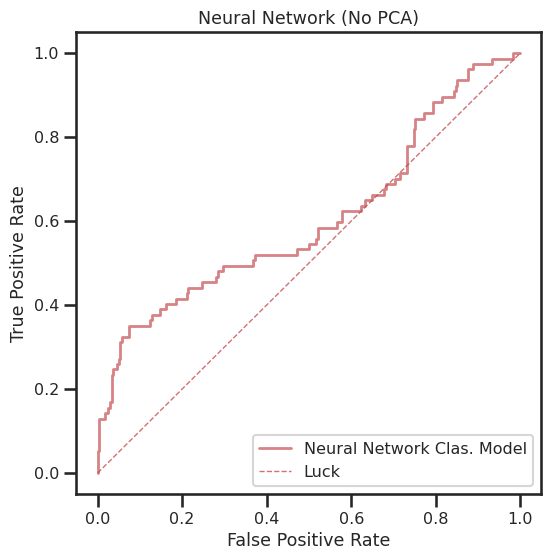

In [273]:
plt.plot(fpr_nn, tpr_nn, lw=2, alpha=0.7 , label = 'Neural Network Clas. Model', color = 'r')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve with LogReg')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('Neural Network (No PCA)')
plt.show()

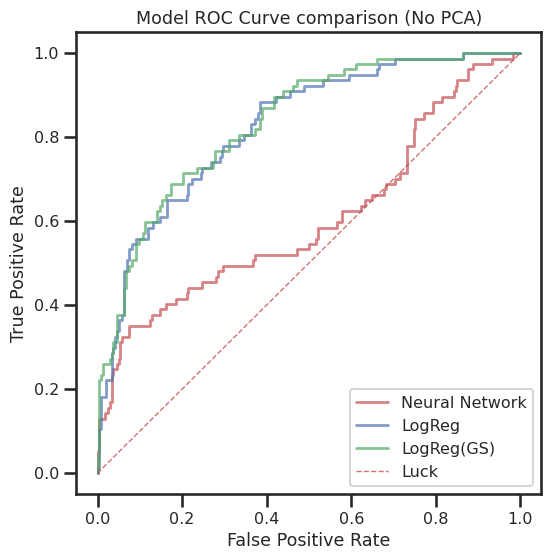

In [274]:
#Ploteamos todas curvas ROC para datos sin PCA
plt.plot(fpr_nn, tpr_nn, lw=2, alpha=0.7 , label = 'Neural Network', color = 'r')
plt.plot(fpr_logreg_default, tpr_logreg_default, lw=2, alpha=0.7 , label = 'LogReg', color = 'b')
plt.plot(fpr_logreg_gs, tpr_logreg_gs, lw=2, alpha=0.7 , label = 'LogReg(GS)', color = 'g')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.grid(False)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('Model ROC Curve comparison (No PCA)')
plt.show()

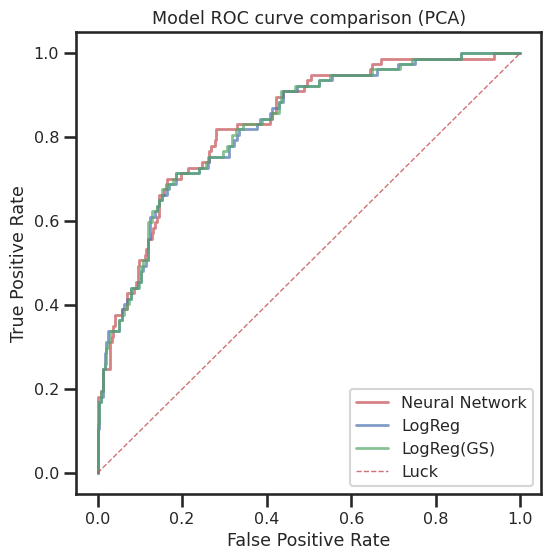

In [276]:
#Ploteamos todas curvas ROC para datos PCA
#Ploteamos todas curvas ROC para datos sin PCA
plt.plot(fpr_nn_pca, tpr_nn_pca, lw=2, alpha=0.7 , label = 'Neural Network', color = 'r')
plt.plot(fpr_logreg_default_pca, tpr_logreg_default_pca, lw=2, alpha=0.7 , label = 'LogReg', color = 'b')
plt.plot(fpr_logreg_gs_pca, tpr_logreg_gs_pca, lw=2, alpha=0.7 , label = 'LogReg(GS)', color = 'g')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve with LogReg')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('Model ROC curve comparison (PCA)')
plt.show()